<a href="https://colab.research.google.com/github/anna01122002/ml/blob/main/ML6_1_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import seaborn as sns


Загрузите прилагающийся датасет.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML6.1_clustering/data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.
Все значения присутствуют в датасете

In [5]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

Стандартизация

In [6]:

scaled_features = StandardScaler().fit_transform(df[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']].values)
scaled_features


array([[-1.73899919, -1.42456879, -0.43480148],
       [-1.73899919, -1.28103541,  1.19570407],
       [-1.70082976, -1.3528021 , -1.71591298],
       [-1.70082976, -1.13750203,  1.04041783],
       [-1.66266033, -0.56336851, -0.39597992],
       [-1.66266033, -1.20926872,  1.00159627],
       [-1.62449091, -0.27630176, -1.71591298],
       [-1.62449091, -1.13750203,  1.70038436],
       [-1.58632148,  1.80493225, -1.83237767],
       [-1.58632148, -0.6351352 ,  0.84631002],
       [-1.58632148,  2.02023231, -1.4053405 ],
       [-1.58632148, -0.27630176,  1.89449216],
       [-1.54815205,  1.37433211, -1.36651894],
       [-1.54815205, -1.06573534,  1.04041783],
       [-1.54815205, -0.13276838, -1.44416206],
       [-1.54815205, -1.20926872,  1.11806095],
       [-1.50998262, -0.27630176, -0.59008772],
       [-1.50998262, -1.3528021 ,  0.61338066],
       [-1.43364376,  0.94373197, -0.82301709],
       [-1.43364376, -0.27630176,  1.8556706 ],
       [-1.39547433, -0.27630176, -0.590

Корреляции между полом и тратами/поступлениями не выявлено

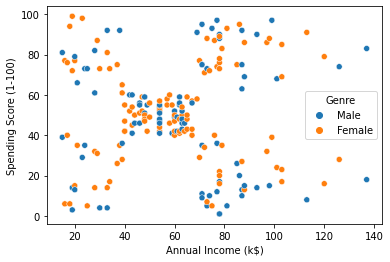

In [7]:
f, ax = plt.subplots()
sns.scatterplot(y="Spending Score (1-100)", x="Annual Income (k$)", hue="Genre",data=df, ax=ax,)
plt.show()


Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.

Оптимальное кол-во кластеров 5

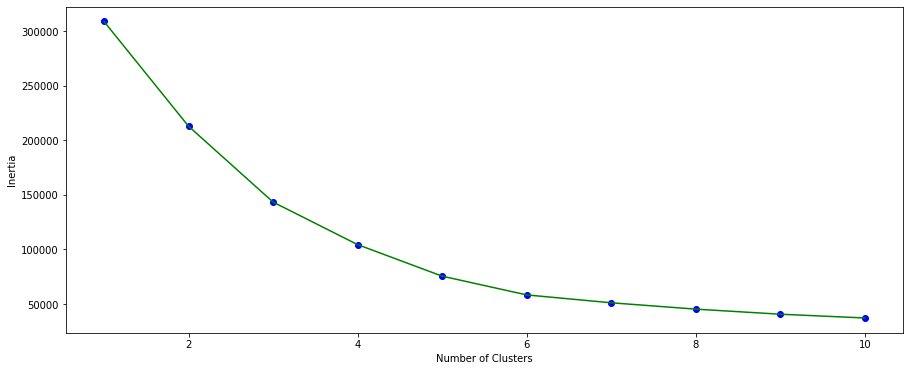

In [8]:
K = range(1, 11)
inertia = []
X1 = df.drop(columns=["CustomerID", "Genre"])

for k in K:
    kmeanModel = (KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=11))
    kmeanModel.fit(X1)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(15, 6))
plt.plot(K, inertia, 'bo')
plt.plot(K, inertia, 'g')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

In [9]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 11)
y_pred = kmeans.fit_predict(X1)
y_pred


array([2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

Построить графическую интерпретацию из пункта 3, с центрами кластеров.

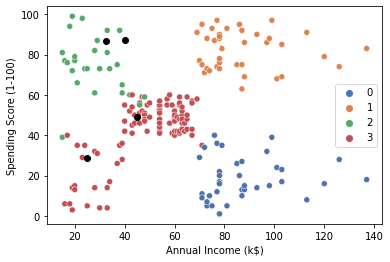

In [10]:
f, ax = plt.subplots()
sns.scatterplot(x=X1['Annual Income (k$)'], y=X1['Spending Score (1-100)'], hue=y_pred, palette="deep", data=X1, ax=ax)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black')
plt.show()

Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.

Оптимальное кол-во кластеров - 4

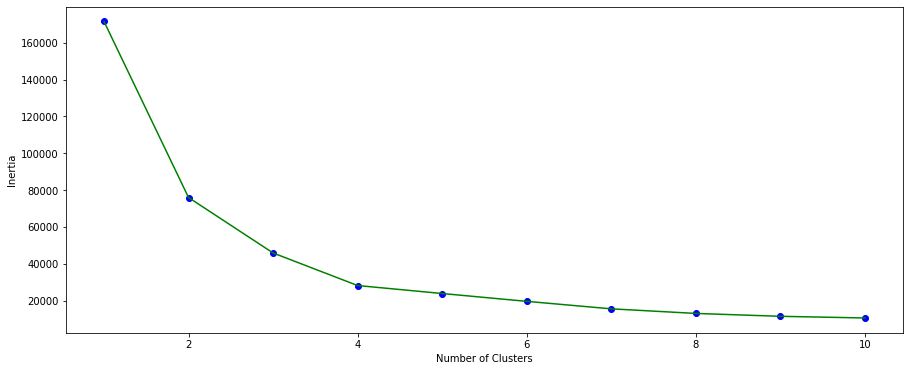

In [11]:
inertia = []
K = range(1, 11)
X2 = df[["Spending Score (1-100)", "Age"]]

for k in K:
    kmeanModel = (KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=11))
    kmeanModel.fit(X2)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(15, 6))
plt.plot(K, inertia, 'bo')
plt.plot(K, inertia, 'g')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Коэффицент зависит от числа кластеров
 нужен для изучения расстояния между кластерами

In [12]:

silhouette_score(X1, y_pred)


0.40570340605429833

In [13]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 11)
y_pred = kmeans.fit_predict(X2)
y_pred


array([3, 1, 2, 1, 3, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 5, 3, 0, 1, 5, 1,
       0, 1, 0, 1, 5, 3, 5, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 4, 1, 5, 3,
       0, 3, 5, 3, 3, 3, 5, 3, 3, 4, 5, 5, 5, 4, 3, 5, 4, 3, 4, 4, 4, 3,
       5, 4, 3, 3, 4, 5, 4, 4, 4, 3, 5, 5, 3, 5, 4, 5, 4, 5, 3, 5, 4, 3,
       3, 5, 4, 3, 5, 5, 3, 3, 5, 3, 5, 3, 3, 5, 4, 3, 5, 3, 4, 5, 4, 4,
       4, 3, 5, 3, 3, 3, 4, 5, 5, 5, 3, 5, 5, 1, 2, 1, 5, 1, 0, 1, 0, 1,
       3, 1, 2, 1, 0, 1, 2, 1, 0, 1, 3, 1, 2, 1, 5, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 2, 1, 2, 1, 5, 1, 2, 1, 0, 1, 0, 1, 2, 3, 2, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 5, 1, 0, 1, 5, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1], dtype=int32)

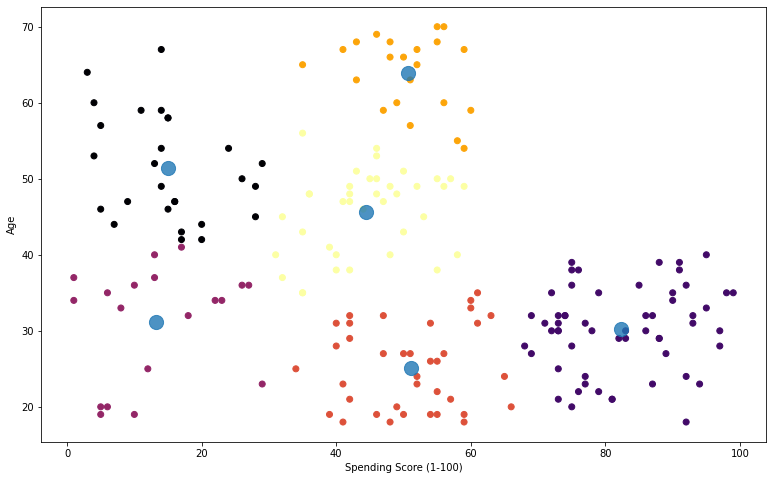

In [14]:

fig = plt.figure(figsize=(13, 8))
centers = kmeans.cluster_centers_
plt.scatter(X2["Spending Score (1-100)"], X2["Age"], c=y_pred, cmap='inferno')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.8);
